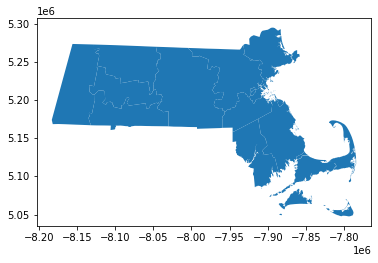

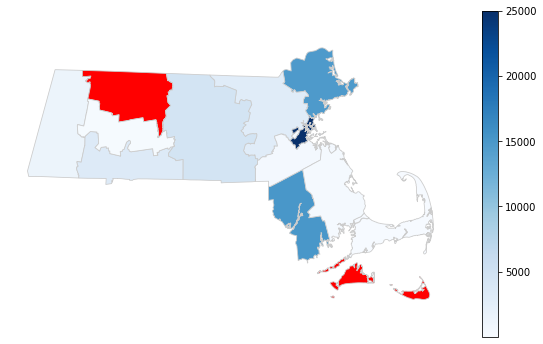

In [29]:
import geopandas as gpd
import matplotlib.pyplot as pet
import pandas as pd
import os 

os.chdir('/Users/mariadubasov/Downloads')

fp = r"Massachusetts_Counties"
map_df = gpd.read_file(fp)
map_df.head()
map_df.plot()
map_df['COUNTY'] = map_df['COUNTY'].str.lower()
#print(map_df)


file = "https://raw.githubusercontent.com/alicezg2/SPEOC-pt-1/main/Data/AssetGeography/county_debt_total.csv"
df = pd.read_csv(file, header=0)
df =  df[df['state']== 'MA'] 
df['county'] = df['county'].str.replace(" County","")
df['county'] = df['county'].str.lower()
df.head()
#print(df)


df.drop(labels='state', axis="columns", inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)


map_df.rename(columns = {'COUNTY':'county'}, inplace = True)

merged = map_df.merge(df,on='county',how='left')
merged['6p_total'] = merged['6p_total'].fillna(0)
#print(merged)


variable = '6p_total'
vmin, vmax = 0.01, 25000
fig, ax = pet.subplots(1, figsize=(10, 6))
cmap = pet.get_cmap('Blues').copy()
cmap.set_under('red')
merged.plot(column=variable, cmap= cmap, linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin)
# can add norm=pet.Normalize(vmin=vmin, vmax=vmax)
ax.axis('off')

# Create colorbar as a legend
sm = pet.cm.ScalarMappable(cmap='Blues', norm=pet.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)


